# 다리 만들기
- source : [백준 2146](https://www.acmicpc.net/problem/2146)
- 난이도 : 골드 III
- 분류 : 그래프 이론, 그래프 탐색, BFS

## 문제
- 여러 섬으로 이루어진 나라가 있다. 이 나라의 대통령은 섬을 잇는 다리를 만들겠다는 공약으로 인기몰이를 해 당선될 수 있었다. 하지만 막상 대통령에 취임하자, 다리를 놓는다는 것이 아깝다는 생각을 하게 되었다. 그래서 그는, 생색내는 식으로 한 섬과 다른 섬을 잇는 다리 하나만을 만들기로 하였고, 그 또한 다리를 가장 짧게 하여 돈을 아끼려 하였다.

- 이 나라는 N×N크기의 이차원 평면상에 존재한다. 이 나라는 여러 섬으로 이루어져 있으며, 섬이란 동서남북으로 육지가 붙어있는 덩어리를 말한다. 다음은 세 개의 섬으로 이루어진 나라의 지도이다.

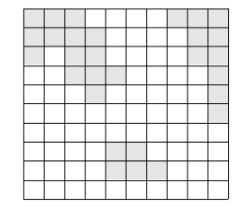

- 위의 그림에서 색이 있는 부분이 육지이고, 색이 없는 부분이 바다이다. 이 바다에 가장 짧은 다리를 놓아 두 대륙을 연결하고자 한다. 가장 짧은 다리란, 다리가 격자에서 차지하는 칸의 수가 가장 작은 다리를 말한다. 다음 그림에서 두 대륙을 연결하는 다리를 볼 수 있다.

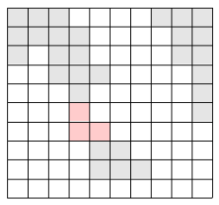

- 물론 위의 방법 외에도 다리를 놓는 방법이 여러 가지 있으나, 위의 경우가 놓는 다리의 길이가 3으로 가장 짧다(물론 길이가 3인 다른 다리를 놓을 수 있는 방법도 몇 가지 있다).

- 지도가 주어질 때, 가장 짧은 다리 하나를 놓아 두 대륙을 연결하는 방법을 찾으시오.
    
## 입력
- 첫 줄에는 지도의 크기 N(100이하의 자연수)가 주어진다. 그 다음 N줄에는 N개의 숫자가 빈칸을 사이에 두고 주어지며, 0은 바다, 1은 육지를 나타낸다. 항상 두 개 이상의 섬이 있는 데이터만 입력으로 주어진다.

## 출력
- 첫째 줄에 가장 짧은 다리의 길이를 출력한다.

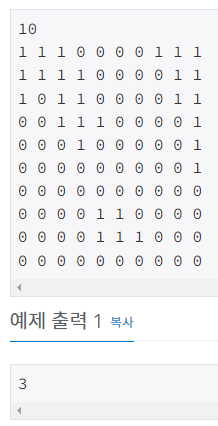


- 최단 거리 
1. 각 섬 구분하기 
2. 바다이거나 다른 섬이면 q에 넣기 
3. 다른 섬에 도달하면 최솟값 갱신

In [25]:
import sys
input = sys.stdin.readline

from collections import deque

# boj 제출용
N = int(input())
arr = [list(map(int, input().split())) for _ in range(N)]

# # notebook 실행용 
# N = 10
# arr = [
#     [1, 1, 1, 0, 0, 0, 0, 1, 1, 1],
#     [1, 1, 1, 1, 0, 0, 0, 0, 1, 1],
#     [1, 0, 1, 1, 0, 0, 0, 0, 1, 1],
#     [0, 0, 1, 1, 1, 0, 0, 0, 0, 1],
#     [0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
#     [0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#         ]

visited = [[False for _ in range(N)] for _ in range(N)]

dx = [1, -1, 0, 0]
dy = [0, 0, -1, 1]

# 격자를 벗어나지 않아야 한다.
def is_range(x, y):
    return 0 <= x < N and 0 <= y < N

# 방문하지 않은 곳이고, 미로에서 이동할 수 있는 칸이다.
def can_go(x, y):
    return not visited[x][y] and arr[x][y] == 1

dx = [0, 0, 1, -1]
dy = [1, -1, 0, 0]

# 1. 섬 구분하기 
def bfs_numbering(x, y):
    global num
    q = deque()
    q.append((x, y))
    visited[x][y] = True  # 시작점 방문처리
    arr[x][y] = num       # 시작점 넘버링
    
    while q:
        x, y = q.popleft()
            
        for i in range(4):
            nx = x + dx[i]
            ny = y + dy[i]
            
            if is_range(nx, ny):
                if can_go(nx, ny):
                    visited[nx][ny] = True
                    arr[nx][ny] = num
                    q.append((nx, ny))
                    
        

num = 1  # 섬 넘버링할 숫자
for i in range(N):
    for j in range(N):
        if arr[i][j] != 0 and not visited[i][j]:            
            bfs_numbering(i, j)
            num += 1
            
            
# 2. 다른 섬으로의 최단 거리 찾기 
# - 모든 곳을 순회한다.
# - 현재 섬이 아닌 바다인 부분을 저장하며 거리를 센다.
# - 현재 섬부터 다른 섬까지 도달하는 총 거리를 세고, 최단 거리일 경우 저장한다.
def bfs_bridge(now):
    global ans
    
    q = deque()
    dist = [[0]* N for _ in range(N)]
    
    for i in range(N):
        for j in range(N):
            if arr[i][j] == now:
                q.append((i, j))
    
    while q:
        x, y = q.popleft()
        
        for i in range(4):
            nx = x + dx[i]
            ny = y + dy[i]
            
            if is_range(nx, ny):
                # 이동했는데 바다라면, 거리를 추가해준다.
                if arr[nx][ny] == 0 and dist[nx][ny] == 0:
                    dist[nx][ny] = dist[x][y] + 1
                    q.append((nx, ny))
                # 이동했는데 다른 섬에 도달했다면, 최단 거리로 값을 갱신해주고 종료.
                if arr[nx][ny] > 0 and arr[nx][ny] != now:
                    ans = min(ans, dist[x][y])
                    return
            
ans = sys.maxsize

for i in range(1, num+1):
    bfs_bridge(i)
    
print(ans)

3


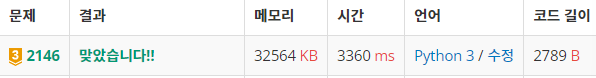

- rstrip() 때문에 Index error가 났다..입력 형식 잘 확인하기
- 초기값 설정 주의하기